# Cloud ML Engine Prediction Test

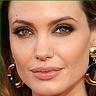

{u'predictions': [{u'prediction': [2.1277719497447833e-06, 0.9999629259109497, 2.6442356102052145e-05, 1.942615455163832e-07, 8.264843927463517e-06]}]}


In [1]:
from googleapiclient import discovery
from oauth2client.client import GoogleCredentials
import numpy
import base64
import logging

from IPython.display import display, Image

cropped_image = "croppedjolie.jpg"
display(Image(cropped_image))

PROJECT = 'terrycho-ml'
MODEL_NAME = 'face_recog'
MODEL_VERSION ='v7'


def call_ml_service(img_str):
    parent = 'projects/{}/models/{}/versions/{}'.format(PROJECT, MODEL_NAME,MODEL_VERSION)
    pred = None

    request_dict = {
        "instances": [
            {
                "image": {
                    "b64": img_str
                }
            }
        ]
    }

    try:
        credentials = GoogleCredentials.get_application_default()
        cloudml_svc = discovery.build('ml', 'v1', credentials=credentials)
        request = cloudml_svc.projects().predict(name=parent, body=request_dict)
        response = request.execute()
        print(response)
        #pred = response['predictions'][0]['scores']
        #pred = numpy.asarray(pred)

    except Exception, e:
        logging.exception("Something went wrong!")

    return pred


# base64 encode the same image
with open(cropped_image, 'rb') as image_file:
    encoded_string = base64.b64encode(image_file.read())

# See what ML Engine thinks
online_prediction = call_ml_service(encoded_string)
